## Analyzing Historical Stock/Revenue Data and Building a Dashboard


In [1]:
!pip install yfinance==0.2.4
#!pip install pandas==1.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.1/502.1 kB 45.5 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1


In [2]:
import yfinance as yf
import pandas as pd

## Using the yfinance Library to Extract Stock Data


In [3]:
tesla = yf.Ticker("TSLA")

In [4]:
tesla_data = tesla.history(period="max")

In [5]:
tesla_data.reset_index(inplace = True)

In [6]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [7]:
import requests
from bs4 import BeautifulSoup

In [8]:
url1 = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

In [9]:
data1 = requests.get(url1).text

In [20]:
soup1 = BeautifulSoup(data1, "html.parser")
soup1.find_all('title')

[<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>]

In [21]:
tesla_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup1.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

/tmp/wsuser/ipykernel_164/1825215984.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True);
/tmp/wsuser/ipykernel_164/1825215984.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True);
/tmp/wsuser/ipykernel_164/1825215984.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True);
/tmp/wsuser/ipykernel_164/1825215984.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tes

In [22]:
tesla_revenue.tail()

,Date,Revenue
50,2010-06-30,28
51,2010-03-31,21
52,2009-12-31,
53,2009-09-30,46
54,2009-06-30,27


In [23]:
gmestop = yf.Ticker("GME")

In [24]:
gme_data = gmestop.history(period="max")

In [25]:
gme_data.reset_index(inplace = True)

In [26]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [27]:
url2 = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

In [28]:
data2 = requests.get(url2).text

In [29]:
soup2 = BeautifulSoup(data2, 'html5lib')

In [30]:
gme_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup2.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    gme_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

/tmp/wsuser/ipykernel_164/268632511.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)
/tmp/wsuser/ipykernel_164/268632511.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)
/tmp/wsuser/ipykernel_164/268632511.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)
/tmp/wsuser/ipykernel_164/268632511.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = te

In [31]:
gme_revenue.tail()

,Date,Revenue
51,2010-03-31,21
52,2009-12-31,
53,2009-09-30,46
54,2009-06-30,27
55,2009-01-31,3492


In [33]:
import matplotlib.pyplot as plt

In [43]:
def make_graph(x, y, z):
    plt.plot(x, y)
    plt.xlabel("Year")
    plt.ylabel("Stock Price(US$)")
    plt.title("Historical Share Price({})".format(z))
    plt.show()
    

In [47]:
time = tesla_data['Date']
stock = tesla_data['Open']
company = 'Tesla'

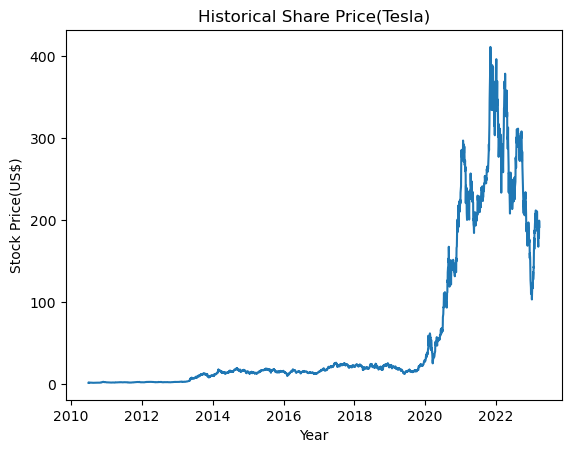

In [48]:
make_graph(time, stock, company)

In [49]:
time = tesla_data['Date']
stock = tesla_data['Open']
company = 'Gmestop'

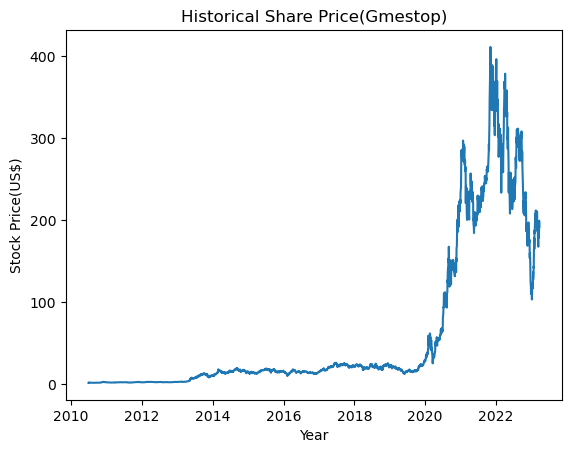

In [50]:
make_graph(time, stock, company)